[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farheenfab/AppliedText_CW/blob/main/CW1-analyze_dataset.ipynb)

In [19]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [20]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import nltk
import spacy


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

In [21]:
# get file from disk
filename = 'final_comments_df2.csv'
final_comments_df=pd.read_csv(filename)

In [22]:
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Love Alarm Season 1,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...",1xLrbvjCx1k,nvillera,2019-10-01T01:32:48Z,"gracias por ver ¡! si tengo algún error, puede...",https://i.ytimg.com/vi/1xLrbvjCx1k/default.jpg,UgymI4uhPmf2rU9nmst4AaABAg,NaN,saikibu,2021-03-12T15:16:47Z,2021-03-12T15:16:47Z,725.0,"Vengo a llorar. Sunho, lo hiciste bien :)."
1,Love Alarm Season 1,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...",1xLrbvjCx1k,nvillera,2019-10-01T01:32:48Z,"gracias por ver ¡! si tengo algún error, puede...",https://i.ytimg.com/vi/1xLrbvjCx1k/default.jpg,Ugxlv0IjyeU9y9CIL-J4AaABAg,NaN,maicolsebastianvegaquiroga8164,2022-07-20T13:59:59Z,2022-07-20T13:59:59Z,1716.0,Esta serie nos demuestra que existen 2 amores ...
2,Love Alarm Season 1,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...",1xLrbvjCx1k,nvillera,2019-10-01T01:32:48Z,"gracias por ver ¡! si tengo algún error, puede...",https://i.ytimg.com/vi/1xLrbvjCx1k/default.jpg,UgyuMtKWSg1g41IVWLV4AaABAg,NaN,cielojuneth,2022-01-29T06:21:55Z,2022-01-29T06:21:55Z,1467.0,"Pinshi drama, ya es 2022 y sigo aún sigo llora..."
3,Love Alarm Season 1,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...",1xLrbvjCx1k,nvillera,2019-10-01T01:32:48Z,"gracias por ver ¡! si tengo algún error, puede...",https://i.ytimg.com/vi/1xLrbvjCx1k/default.jpg,UgymkUO5XCYBkcDNWKF4AaABAg,NaN,mirtanormadavid7287,2023-01-26T00:52:46Z,2023-01-26T00:52:46Z,350.0,2023 y aún lloro a esta serie Sun Oh se feliz...
4,Love Alarm Season 1,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...",1xLrbvjCx1k,nvillera,2019-10-01T01:32:48Z,"gracias por ver ¡! si tengo algún error, puede...",https://i.ytimg.com/vi/1xLrbvjCx1k/default.jpg,UgxvgMKvQqz4BXO4qtF4AaABAg,NaN,anabelencofficial,2021-11-18T17:01:26Z,2021-11-18T17:01:26Z,689.0,Esta serie fue el claro ejemplo de que aveces ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40531,Love Alarm Season 2,wait for the Twist..🤣#kdrama #shorts #lovealarm,591hS-MP3NM,CherryBlossom,2022-09-24T10:09:50Z,cherryblossom.,https://i.ytimg.com/vi/591hS-MP3NM/default.jpg,UgxHL-bICq7TcTtfqDV4AaABAg.9gYDgjcDMlT9gZYrBMk5IO,UgxHL-bICq7TcTtfqDV4AaABAg,myweirdlife5279,2022-09-29T14:45:49Z,2022-09-29T14:45:49Z,0.0,@7 Army love alarm
40532,Love Alarm Season 2,wait for the Twist..🤣#kdrama #shorts #lovealarm,591hS-MP3NM,CherryBlossom,2022-09-24T10:09:50Z,cherryblossom.,https://i.ytimg.com/vi/591hS-MP3NM/default.jpg,Ugz4konhLiToR_QwJ554AaABAg.9zQbTrdxL949zRGUfKSWbd,Ugz4konhLiToR_QwJ554AaABAg,cherryblossom7949,2024-01-11T15:27:53Z,2024-01-11T15:27:53Z,0.0,Same
40533,Love Alarm Season 2,wait for the Twist..🤣#kdrama #shorts #lovealarm,591hS-MP3NM,CherryBlossom,2022-09-24T10:09:50Z,cherryblossom.,https://i.ytimg.com/vi/591hS-MP3NM/default.jpg,Ugz4konhLiToR_QwJ554AaABAg.9zQbTrdxL949zkD_sNdX_g,Ugz4konhLiToR_QwJ554AaABAg,niankochwan1233,2024-01-19T09:27:20Z,2024-01-19T09:27:20Z,0.0,Why? What's the story
40534,Love Alarm Season 2,wait for the Twist..🤣#kdrama #shorts #lovealarm,591hS-MP3NM,CherryBlossom,2022-09-24T10:09:50Z,cherryblossom.,https://i.ytimg.com/vi/591hS-MP3NM/default.jpg,Ugz4konhLiToR_QwJ554AaABAg.9zQbTrdxL94A-KwX3gIXtu,Ugz4konhLiToR_QwJ554AaABAg,Safire919,2024-02-03T01:00:40Z,2024-02-03T01:00:40Z,0.0,"So technically JoJo, and sunho start dating, b..."


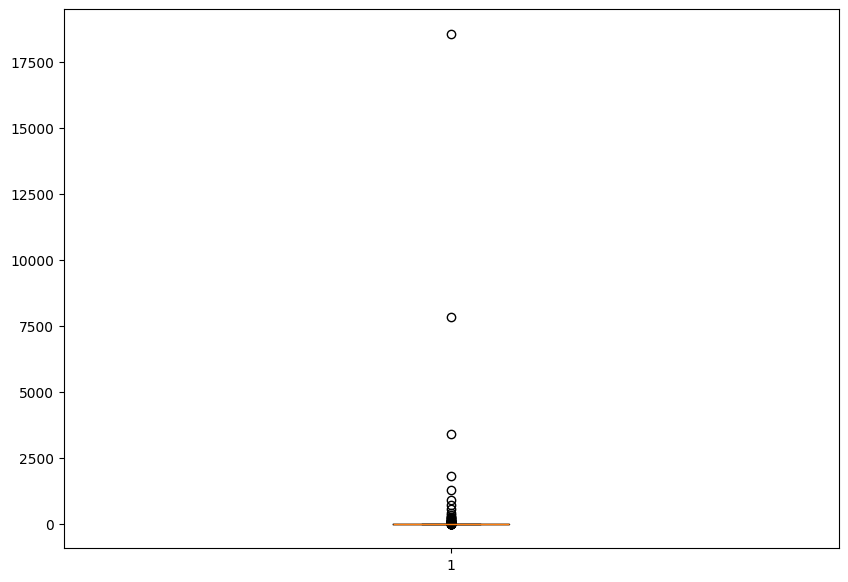

In [23]:
import matplotlib.pyplot as plt

data = final_comments_df['c_like_count'].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.show()


In [24]:
# number of comments per product 
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Love Alarm Season 1,20189
1,Love Alarm Season 2,20347


In [25]:
# product 0 is generated due to how I handled videos with comments disabled
# remove comments according to like threshold
# this is done to make sure the comment are relevent 
like_threshold=1
final_comments_df=final_comments_df[final_comments_df['c_like_count'] >= like_threshold]
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Love Alarm Season 1,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...",1xLrbvjCx1k,nvillera,2019-10-01T01:32:48Z,"gracias por ver ¡! si tengo algún error, puede...",https://i.ytimg.com/vi/1xLrbvjCx1k/default.jpg,UgymI4uhPmf2rU9nmst4AaABAg,NaN,saikibu,2021-03-12T15:16:47Z,2021-03-12T15:16:47Z,725.0,"Vengo a llorar. Sunho, lo hiciste bien :)."
1,Love Alarm Season 1,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...",1xLrbvjCx1k,nvillera,2019-10-01T01:32:48Z,"gracias por ver ¡! si tengo algún error, puede...",https://i.ytimg.com/vi/1xLrbvjCx1k/default.jpg,Ugxlv0IjyeU9y9CIL-J4AaABAg,NaN,maicolsebastianvegaquiroga8164,2022-07-20T13:59:59Z,2022-07-20T13:59:59Z,1716.0,Esta serie nos demuestra que existen 2 amores ...
2,Love Alarm Season 1,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...",1xLrbvjCx1k,nvillera,2019-10-01T01:32:48Z,"gracias por ver ¡! si tengo algún error, puede...",https://i.ytimg.com/vi/1xLrbvjCx1k/default.jpg,UgyuMtKWSg1g41IVWLV4AaABAg,NaN,cielojuneth,2022-01-29T06:21:55Z,2022-01-29T06:21:55Z,1467.0,"Pinshi drama, ya es 2022 y sigo aún sigo llora..."
3,Love Alarm Season 1,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...",1xLrbvjCx1k,nvillera,2019-10-01T01:32:48Z,"gracias por ver ¡! si tengo algún error, puede...",https://i.ytimg.com/vi/1xLrbvjCx1k/default.jpg,UgymkUO5XCYBkcDNWKF4AaABAg,NaN,mirtanormadavid7287,2023-01-26T00:52:46Z,2023-01-26T00:52:46Z,350.0,2023 y aún lloro a esta serie Sun Oh se feliz...
4,Love Alarm Season 1,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...",1xLrbvjCx1k,nvillera,2019-10-01T01:32:48Z,"gracias por ver ¡! si tengo algún error, puede...",https://i.ytimg.com/vi/1xLrbvjCx1k/default.jpg,UgxvgMKvQqz4BXO4qtF4AaABAg,NaN,anabelencofficial,2021-11-18T17:01:26Z,2021-11-18T17:01:26Z,689.0,Esta serie fue el claro ejemplo de que aveces ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40522,Love Alarm Season 2,wait for the Twist..🤣#kdrama #shorts #lovealarm,591hS-MP3NM,CherryBlossom,2022-09-24T10:09:50Z,cherryblossom.,https://i.ytimg.com/vi/591hS-MP3NM/default.jpg,UgyfPfi87xFQmycur2x4AaABAg,NaN,shadeesadikrama8077,2022-09-28T18:02:09Z,2022-09-28T18:02:09Z,1.0,Skipp
40526,Love Alarm Season 2,wait for the Twist..🤣#kdrama #shorts #lovealarm,591hS-MP3NM,CherryBlossom,2022-09-24T10:09:50Z,cherryblossom.,https://i.ytimg.com/vi/591hS-MP3NM/default.jpg,Ugzw2YQuyKyGXzOmIzR4AaABAg,NaN,kiwikiwi1230,2023-05-04T13:59:08Z,2023-05-04T13:59:08Z,1.0,Song kang
40527,Love Alarm Season 2,wait for the Twist..🤣#kdrama #shorts #lovealarm,591hS-MP3NM,CherryBlossom,2022-09-24T10:09:50Z,cherryblossom.,https://i.ytimg.com/vi/591hS-MP3NM/default.jpg,Ugz4konhLiToR_QwJ554AaABAg,NaN,user-eu7yn2ng8k,2024-01-11T09:20:46Z,2024-01-11T09:20:46Z,1.0,The worst drama i have ever seen
40528,Love Alarm Season 2,wait for the Twist..🤣#kdrama #shorts #lovealarm,591hS-MP3NM,CherryBlossom,2022-09-24T10:09:50Z,cherryblossom.,https://i.ytimg.com/vi/591hS-MP3NM/default.jpg,UgxHL-bICq7TcTtfqDV4AaABAg.9gYDgjcDMlT9gZGUZ77lmc,UgxHL-bICq7TcTtfqDV4AaABAg,7boy7.,2022-09-29T12:05:18Z,2022-09-29T12:05:18Z,2.0,Name of the drama


In [26]:
# number of comments remaining per product after filtering
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Love Alarm Season 1,10609
1,Love Alarm Season 2,11377


In [27]:
final_comments_df.groupby('v_title').size().reset_index(name='counts')


,v_title,counts
0,15 BEST School Korean Dramas That&#39;ll Give ...,1321
1,Cast of Love Alarm spills the beans on love an...,1174
2,Han So-hee claims Song Kang’s lips for herself...,870
3,Kim So-hyun and Song Kang’s first kiss | Love ...,2288
4,Love Alarm 2 (좋아하면​ 울리는 2) Full OST,863
5,Love Alarm Season 2 | Official Trailer | Netfl...,3530
6,Love Alarm | Falling Again (lyrics),2316
7,Love Alarm | Official Trailer | Netflix,1378
8,Song Kang breaks Han So-hee’s resolve | Nevert...,1263
9,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...",3050


In [28]:
# get sentiment
def analyze_sentiment(comment):
    try:
        analysis = TextBlob(comment)
        return analysis.sentiment.polarity
    except:
        return 0.0
# Textblob sentiment analysis used due to the size of the dataset
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_blob_sentiment"] = final_comments_df['c_text'].apply(analyze_sentiment)
final_comments_df[['v_title','c_text','c_author','c_blob_sentiment']].sort_values('c_blob_sentiment')

C:\Users\ishaq\AppData\Local\Temp\ipykernel_940\2144388512.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_comments_df["c_blob_sentiment"] = final_comments_df['c_text'].apply(analyze_sentiment)


,v_title,c_text,c_author,c_blob_sentiment
25760,Cast of Love Alarm spills the beans on love an...,ga ram: have you ever been rejected? \nsong ka...,ivxoz,-1.0
39093,[Behind the Scenes] Song Kang and Jung Ga-ram ...,WE!!! BADLY!!!! NEED!!!! SEASON 2!!!!!,sebastiankoo2676,-1.0
11559,Love Alarm | Falling Again (lyrics),Si soy :'(((,mai_deluque,-1.0
1509,"TEARLINER, HAEJIN - Blooming Story (Love Alarm...","@Manzanita Hernández yo igual, se me hizo tris...",regina2512,-1.0
31724,Love Alarm Season 2 | Official Trailer | Netfl...,Sun Ohs the one who did bad. I just cant ignor...,hisokahemmings,-1.0
...,...,...,...,...
12734,Love Alarm | Falling Again (lyrics),Every thing was perfect but the ending,mrbrahminboy7003,1.0
15966,15 BEST School Korean Dramas That&#39;ll Give ...,"Su ho and Ju kyung are perfect, but in season ...",pranavigupta2939,1.0
22404,Love Alarm | Falling Again (lyrics),Perfect voice!!,angminhuc5576,1.0
15923,15 BEST School Korean Dramas That&#39;ll Give ...,seojun is the best he take care of jugyeong th...,glamgirl5068,1.0


Im not sure if even mapping is the correct choice but ill go with this for now

In [29]:
def map_sentiment(value):
    if value > 0:
        return "positive"
    elif value < 0:
        return "negative"
    else:
        return "neutral"
    
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_sentiment"] = final_comments_df['c_blob_sentiment'].apply(map_sentiment)
final_comments_df[['v_videoId','c_text','c_blob_sentiment','c_sentiment']].sort_values('c_sentiment')
final_comments_df["c_sentiment"].value_counts()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_940\194784812.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_comments_df["c_sentiment"] = final_comments_df['c_blob_sentiment'].apply(map_sentiment)


c_sentiment
neutral     11088
positive     7917
negative     2981
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X = final_comments_df['c_text'] 
y = final_comments_df['c_sentiment'] 
# create a 20% test 80% train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# product specific stopwords
product_tokens=np.concatenate([word_tokenize(product.lower()) for product in final_comments_df['product'].unique()])
# remove digits and any single character
product_tokens = [token for token in product_tokens if len(token) > 1 and not token.isdigit()]
product_tokens += ['drama', 'film', 'cinema', 'actor', 'actress', 'director', 'plot',
                         'scene', 'genre', 'subtitles', 'k-drama', 'kdrama', 'k-movie', 'television',
                         'episode', 'screenplay', 'script', 'cinematography', 'soundtrack',
                         'OST', 'character', 'plot twist', 'review', 'ratings', 'premiere',
                         'streaming', 'watchlist', 'subbed', 'dubbed', 'sequel', 'game', 'song',
                         'season', 'trailer', 'casting', 'fanbase', 'recommendation', 'goblin',
                         'viewer', 'critic', 'Korean', 'entertainment', 'watched', 'guardian',
                         'show', 'squid', 'watch', 'watching', 'acting', 'netflix', 'show',
                         'jojo', 'kim', 'hye', 'sun', 'yeong', 'end', 'start', 'like', 'oh', 'someone',
                         'people', 'girl', 'boy', 'man', 'women', 'woman', 'love', 'alarm', 'ring',
                         'application', 'technology', 'romance', 'relationship', 'friendship',
                         'emotion', 'heart', 'dating', 'app','feelings', 'confession', 'secret',
                         'school', 'ringing', 'notification','person','sunoh','year','feel','guy',
                         'sunho','everyone','hate','ending','know','end',
                         'heartache', 'crush','friend', 'friendship', 'romantic', 'triangle']

In [32]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


X = final_comments_df['c_text']
y = final_comments_df['c_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Processing
def preprocess_text(text):
    tokens = word_tokenize(text)
    # stopwords punctuation etc
    stop_words = set(stopwords.words('english'))
    stemmer = nltk.stem.SnowballStemmer('english')
    # stemmer = PorterStemmer()
    # split into tokens
    tokens = word_tokenize(text)
    # removes stopwords and numbers and stems from tokens makes sure its all lowercase too
    tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token.lower() not in stop_words and token.lower() not in product_tokens]
    return ' '.join(tokens)


In [33]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([
    ('preprocess', 
    TfidfVectorizer(preprocessor=preprocess_text,
                    norm='l2',
                    encoding='utf-8',
                    lowercase=True,
                    ngram_range=(1, 1),
                    max_df=0.8,
                    min_df=10,
                    binary=True,
                    max_features=500,
                    sublinear_tf=True)
    # CountVectorizer(preprocessor=preprocess_text,ngram_range=(1, 1))
     ), 
    ('classifier', LogisticRegression())
])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print(classification_report(y_test, y_pred))

c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.77      0.35      0.48       592
     neutral       0.79      0.95      0.86      2250
    positive       0.82      0.74      0.78      1556

    accuracy                           0.80      4398
   macro avg       0.79      0.68      0.71      4398
weighted avg       0.80      0.80      0.78      4398



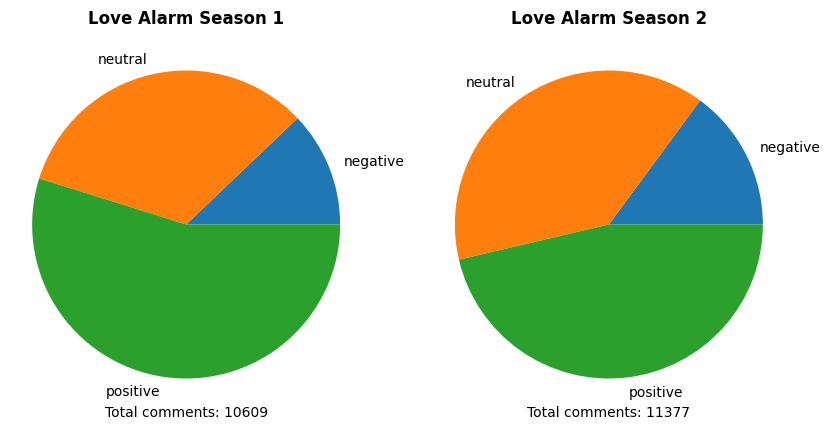

In [34]:
import matplotlib.pyplot as plt

products = sorted(final_comments_df['product'].unique())
sentiments = sorted(final_comments_df['c_sentiment'].unique())
count = 0

plt.figure(figsize=(10, 11))

for product in products:
    labels = sentiments

    val_counts = sorted(final_comments_df[final_comments_df['product'] == product]['c_sentiment'].value_counts())
    sizes = [val_count / sum(val_counts) for val_count in val_counts]

    plt.subplot(len(products)//2 + 1, 2, count % 6 + 1)
    plt.axis('equal')
    plt.title(product, fontweight='bold')

    plt.pie(sizes, labels=labels)
    bottom_text = f"Total comments: {len(final_comments_df[final_comments_df['product'] == product])}"
    plt.text(0.5, 0.0, bottom_text, size=10, ha="center", transform=plt.gca().transAxes)
    count += 1

plt.show()
# We can infer what the majority of people think about the product
# since these laptops are selected from the top 5 best laptops according to lapmag
# the sentiment is likely to be positive as it is here

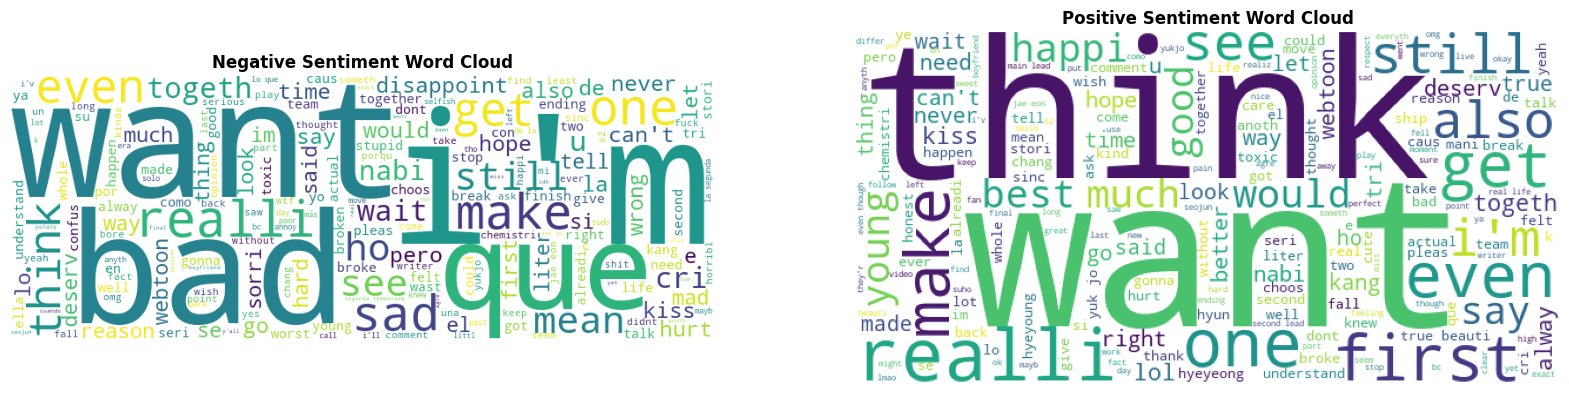

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_comments = final_comments_df[final_comments_df['c_sentiment'] == 'positive']['c_text']
negative_comments = final_comments_df[final_comments_df['c_sentiment'] == 'negative']['c_text']

stop_words = set(stopwords.words('english')).union(product_tokens)
# apply stemming to stop words
stemmer = nltk.stem.SnowballStemmer('english')
stop_words_stemmed = set([stemmer.stem(word) for word in stop_words])

positive_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in positive_comments]

negative_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in negative_comments]

wordcloud_positive = WordCloud(width=600, height=300, background_color='white',
                               stopwords=stop_words_stemmed)\
                                .generate(' '.join(positive_comments_stemmed))
wordcloud_negative = WordCloud(width=800, height=300, background_color='white',
                               stopwords=stop_words_stemmed)\
                                .generate(' '.join(negative_comments_stemmed))



plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Negative Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_negative)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Positive Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_positive)
plt.axis('off')

plt.show()
# shows words present in positive and negative sentiment text 

In [36]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# text_clf = Pipeline([
#     ('vectorizer', TfidfVectorizer()),
#     ('classifier', MultinomialNB())
# ])

# parameters = {
#     'vectorizer': [TfidfVectorizer(),CountVectorizer()],
#     'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'vectorizer__preprocessor':[preprocess_text],
#     'vectorizer__encoding':['utf-8'],
#     # 'vectorizer__max_df': [0.6, 0.9],
#     'vectorizer__min_df': [3],
#     # 'vectorizer__max_features': [1,2,3],
#     # 'vectorizer__norm': ['l1', 'l2'],
#     # 'vectorizer__smooth_idf': [False,True],
#     'vectorizer__binary':[False,True],
#     'vectorizer__lowercase':[False,True],
#     # 'vectorizer__sublinear_tf': [True, False],
#     # 'vectorizer__use_idf': [True, False],
#     'classifier': [
#                     MultinomialNB(),
#                     SVC(),
#                     LogisticRegression(),
#                     RandomForestClassifier()
#                    ],
# }

# grid_search = GridSearchCV(text_clf, parameters, cv=2, n_jobs=1)
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# print(classification_report(y_test, y_pred))